In [2]:
import numpy as np 
import pandas as pd 
import nltk
nltk.download()
nltk.download('punkt')
import seaborn as sns
import matplotlib.pyplot as plt  

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
#importing sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
# Loading the dataset 
dataset= pd.read_csv("Emotional_analysis.csv")

In [8]:
#printing the dataset
dataset

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [10]:
#changing the name of the columns 
dataset = dataset.rename(columns={"sentiment":"Feeling"})
dataset = dataset.rename(columns={"text":"tweets"})

In [11]:
#printing the new dataset
dataset

,Unnamed: 0,Feeling,tweets
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


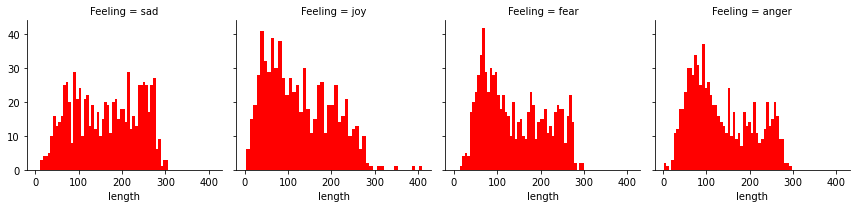

In [14]:
#Dataset Summary
dataset.describe(include='all')
dataset['length'] = dataset['tweets'].apply(len)
dataset.head()
graph = sns.FacetGrid(data=dataset, col="Feeling")
graph.map(plt.hist, 'length', bins=50, color="Red")

In [15]:
#Getting the mean values 
val = dataset.groupby('Feeling').mean()
val

,Unnamed: 0,length
Feeling,,
anger,3478.069100,134.859192
fear,4016.823970,141.269663
joy,1517.969739,126.066025
sad,1661.026415,162.874214


In [16]:
#Finding the correlation 
val.corr()

,Unnamed: 0,length
Unnamed: 0,1.000000,-0.158694
length,-0.158694,1.000000


In [17]:
dataset.Feeling.value_counts()

fear     801
sad      795
anger    767
joy      727
Name: Feeling, dtype: int64

Plotting the Dataset

In [1]:
Feeling_val = dataset.groupby('Feeling').count()
plt.bar(Feeling_val.index.values, Feeling_val['tweets'])
plt.xlabel('Review of Feelings')
plt.ylabel('Number of Tweets')
plt.show(x)

NameError: name 'dataset' is not defined